### Esercitazione 12

In questa simulazione si affronta il problema della classificazione automatica delle cifre manoscritte utilizzando il dataset **MNIST**.Sono state implementate e confrontate due architetture di reti neurali profonde sviluppate con **Keras**:

1. Una **Deep Neural Network** DNN
2. Una **Convolutional Neural Network** CNN

L'obiettivo è valutare le differenze in termini di accuratezza e capacità di generalizzazione delle due architetture su un compito di visione artificiale relativamente semplice ma didatticamente significativo.

Il dataset **MNIST** è uno standard di riferimento per la classificazione di immagini di cifre manoscritte. Esso contiene un totale di 70.000 immagini in scala di grigi, ciascuna della dimensione di $28 \times 28$ pixel. La suddivisione è la seguente:

- 60.000 immagini per l’addestramento (training set)
- 10.000 immagini per il test (test set)

Ogni immagine rappresenta una cifra da 0 a 9. I valori dei pixel sono interi compresi tra 0 e 255, e vengono normalizzati su scala $[0, 1]$ per rendere più efficiente l’addestramento.


### Rete neurale completamente connessa DNN

La prima architettura è una **rete neurale profonda** in cui ogni neurone di un livello è connesso a tutti i neuroni del livello successivo. Prima dell’addestramento, le immagini devono essere appiattite (flatten), ovvero convertite in vettori unidimensionali da $28 \times 28 = 784$ elementi.

La rete è composta da:

- Un **primo layer denso** (fully connected) con 400 neuroni e funzione di attivazione ReLU.
- Un **secondo layer denso** con 100 neuroni e attivazione ReLU.
- Un **layer di dropout**, che disattiva casualmente una parte dei neuroni durante l’addestramento, con lo scopo di ridurre l’overfitting.
- Un **layer di output** con 10 neuroni (uno per ciascuna classe), con funzione di attivazione *softmax*, che restituisce le probabilità di appartenenza alle classi.

L’ottimizzazione viene effettuata mediante l’algoritmo **Stochastic Gradient Descent (SGD)**, e la funzione di perdita è la **categorical crossentropy**.

Al termine dell’addestramento, si valuta l’accuratezza della rete sul test set e si salvano i pesi del modello. Vengono inoltre generati grafici relativi all’andamento della **loss** e della **accuratezza** durante le epoche di training.




X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7597 - acc: 0.7758 - val_loss: 0.3188 - val_acc: 0.9099
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3840 - acc: 0.8889 - val_loss: 0.2390 - val_acc: 0.9307
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3072 - acc: 0.9140 - val_loss: 0.2010 - val_acc: 0.9399
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - acc: 0.9274 - val_loss: 0.1755 - val_acc: 0.9484
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2303 - acc: 0.9359 - val_loss: 0.1601 - val_acc: 0.95

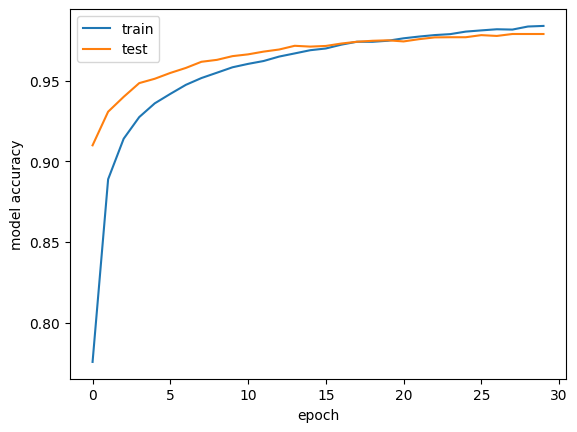

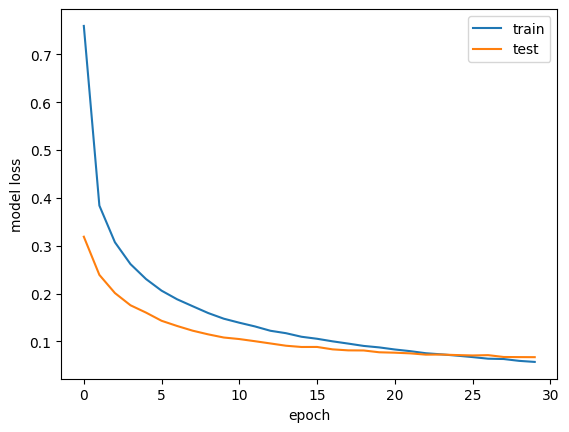

313/313 [==============================] - 1s 2ms/step


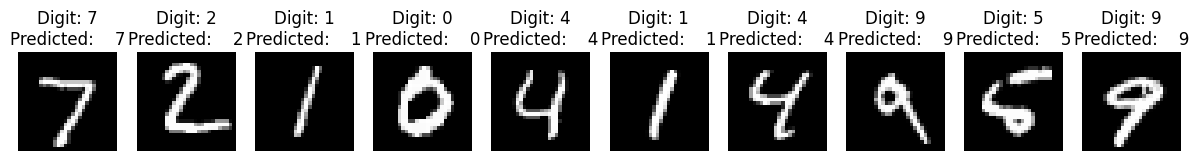

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
Modello salvato con successo!


In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')


def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32
epochs = 30 #usarne 30

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.close()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.close()

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


model_DNN.save("mnist_dnn_model.h5")
print("Modello salvato con successo!")

### Rete neurale convoluzionale CNN

La seconda architettura utilizza una rete **convoluzionale**, progettata per sfruttare le proprietà spaziali delle immagini. A differenza della DNN, le immagini non vengono appiattite, ma conservano la loro struttura bidimensionale con un solo canale (bianco e nero).

La rete CNN è composta da:

- Un primo **strato convoluzionale** con 10 filtri $5 \times 5$, seguito da una funzione di attivazione ReLU.
- Un **max pooling** con finestra $2 \times 2$ per ridurre la dimensionalità spaziale.
- Un secondo **strato convoluzionale** con 64 filtri $3 \times 3$, seguito da un ulteriore max pooling.
- Uno **strato di dropout** per mitigare l’overfitting.
- Un terzo **strato convoluzionale** con 128 filtri $3 \times 3$.
- Un ulteriore livello di dropout.
- Uno **strato di flattening**, che trasforma le mappe di attivazione in un vettore unidimensionale.
- Un **denso intermedio** da 256 neuroni con ReLU.
- Un ulteriore **dropout**.
- Infine, un **livello di uscita** con 10 neuroni e attivazione softmax.

Anche in questo caso, l’ottimizzatore è SGD e la funzione di perdita è la categorical crossentropy. La rete viene addestrata per lo stesso numero di epoche e batch size della DNN, per permettere un confronto equo.

Al termine, si valuta la performance sul test set e si salvano i pesi del modello. Vengono inoltre generati i grafici dell’accuratezza e della perdita durante l’addestramento.



X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 28, 28)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7923 - acc: 0.7379 - val_loss: 0.1514 - val_acc: 0.9535
Epoch 2/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2236 - acc: 0.9309 - val_loss: 0.0908 - val_acc: 0.9694
Epoch 3/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1554 - acc: 0.9522 - val_loss: 0.0696 - val_acc: 0.9766
Epoch 4/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1303 - acc: 0.9600 - val_loss: 0.0560 - val_acc: 0.9814
Epoch 5/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1100 - acc: 0.9669 - val_loss: 0.0492 -

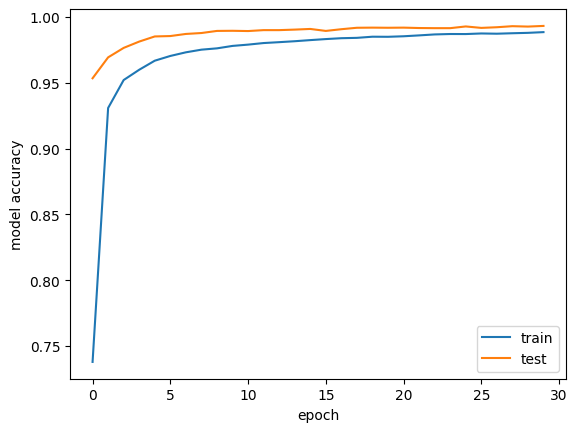

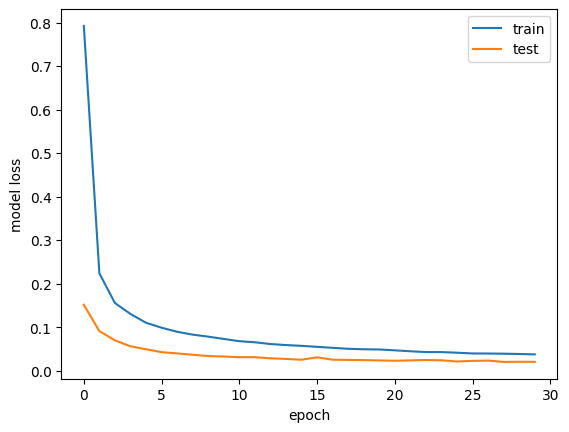

313/313 [==============================] - 1s 4ms/step


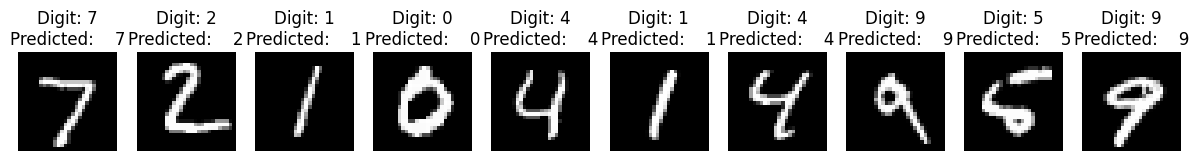

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples
Modello salvato con successo!


In [6]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os

# fix random seed
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

# reshape data, it could depend on Keras backend

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10,kernel_size=(5,5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    # Terzo blocco conv opzionale
    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))  # Dropout più alto prima del softmax per regolarizzare

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    
    return model

print('Model architecture created successfully!')


def compile_model():
    model=create_CNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32
epochs = 30

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

# create the deep neural net
model_CNN = compile_model()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.close()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.close()

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


model_CNN.save("mnist_cnn_model.h5")
print("Modello salvato con successo!")


### Confronto tra le due reti

Le due reti risolvono lo stesso compito ma adottano approcci diversi:

- La **DNN** tratta ogni pixel come un input indipendente, trascurando la struttura spaziale dell’immagine.
- La **CNN** sfrutta la località spaziale e l’invarianza traslazionale, risultando in genere più efficiente e precisa per compiti di visione artificiale.


### Test su immagini esterne

Le reti neurali sono state testate anche su numeri scritti a mano, questo però ha causato una riduzione delle performance predittive del modello, dato che i numeri disegnati non sono perfettamente simili a quelli di training ed avendone solo 60000, risulta mediamente efficente.



Modello caricato con successo!
Elaboro: ./Pictures/cinque.png
1/1 [==============================] - 0s 62ms/step


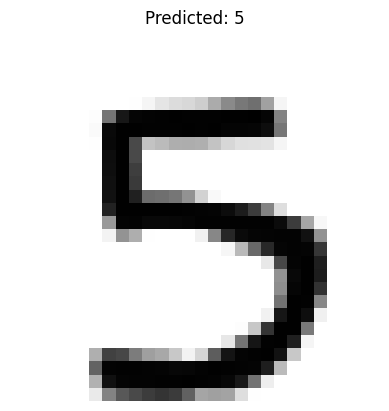

Probabilità per ogni classe: [[2.2027400e-06 4.2267748e-06 7.1847258e-05 4.1054044e-02 2.8512250e-07
  9.5477092e-01 9.7651955e-06 2.1666150e-05 3.9151874e-03 1.4980140e-04]]
Classe predetta: 5

Elaboro: ./Pictures/due.png
1/1 [==============================] - 0s 24ms/step


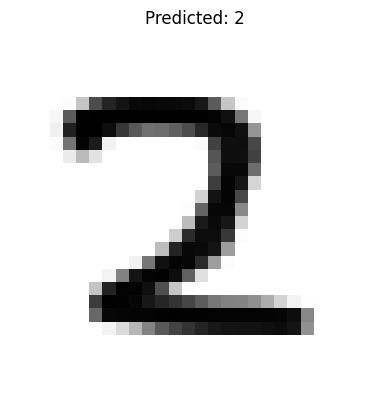

Probabilità per ogni classe: [[7.3390072e-03 3.4378916e-03 9.8425609e-01 1.0182926e-03 1.5201678e-03
  9.3264745e-05 1.7919436e-05 7.3787355e-04 1.0605723e-03 5.1890465e-04]]
Classe predetta: 2

Elaboro: ./Pictures/nove.png
1/1 [==============================] - 0s 23ms/step


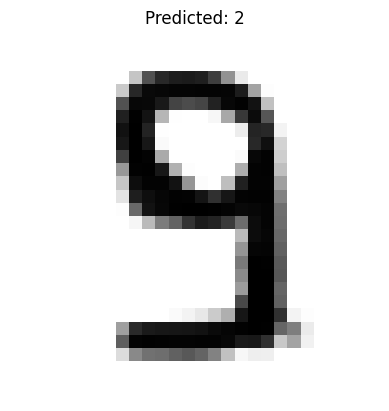

Probabilità per ogni classe: [[4.7041131e-03 2.9705247e-04 7.2406805e-01 1.5904836e-02 1.2727176e-03
  1.9696271e-02 9.3183841e-04 5.8129220e-04 2.0207569e-01 3.0468056e-02]]
Classe predetta: 2

Elaboro: ./Pictures/otto.png
1/1 [==============================] - 0s 22ms/step


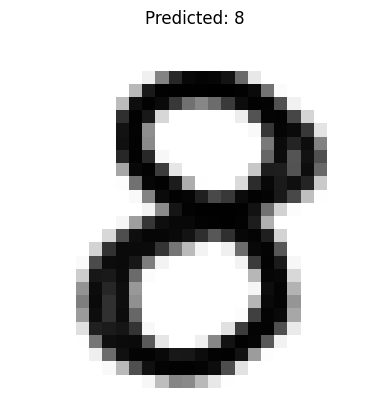

Probabilità per ogni classe: [[2.8631657e-03 6.8571005e-04 1.3860320e-01 8.0631420e-02 3.2785872e-04
  7.6795138e-02 3.6590707e-03 1.3756361e-03 6.7952347e-01 1.5535338e-02]]
Classe predetta: 8

Elaboro: ./Pictures/quattro.png
1/1 [==============================] - 0s 19ms/step


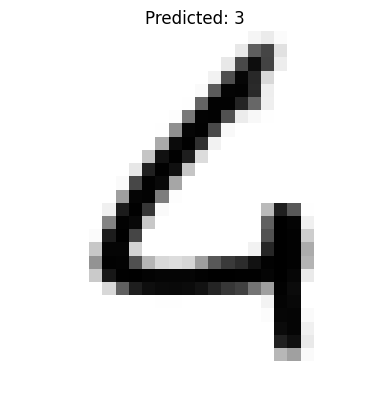

Probabilità per ogni classe: [[0.01831311 0.03070762 0.00292784 0.6055547  0.04791511 0.14203706
  0.00657712 0.00089465 0.02245362 0.1226192 ]]
Classe predetta: 3

Elaboro: ./Pictures/sei.png
1/1 [==============================] - 0s 20ms/step


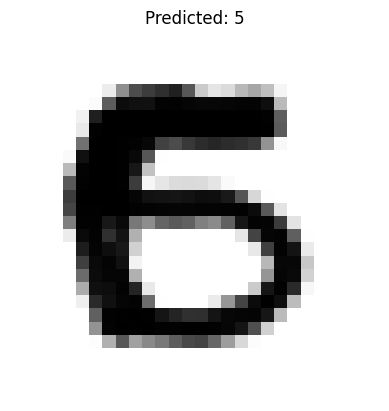

Probabilità per ogni classe: [[7.9517304e-05 9.5159994e-06 1.7534164e-03 4.3120596e-01 3.8388428e-08
  5.6552255e-01 7.6227203e-05 3.9129172e-05 1.2454594e-03 6.8209243e-05]]
Classe predetta: 5

Elaboro: ./Pictures/sette.png
1/1 [==============================] - 0s 26ms/step


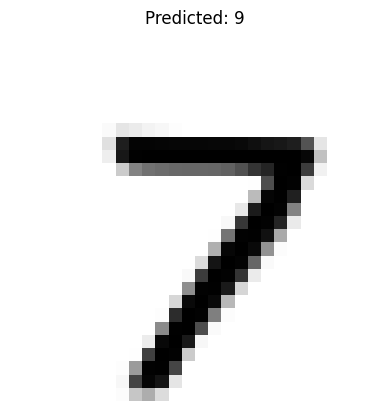

Probabilità per ogni classe: [[0.00363933 0.00713219 0.03160364 0.00586199 0.00185259 0.26767537
  0.0105539  0.09378155 0.23121971 0.34667972]]
Classe predetta: 9

Elaboro: ./Pictures/tre.png
1/1 [==============================] - 0s 23ms/step


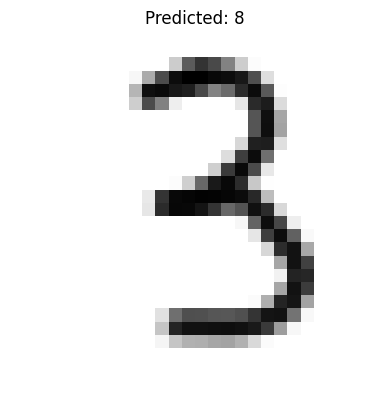

Probabilità per ogni classe: [[0.08615828 0.00420526 0.15696435 0.02269932 0.00650558 0.05302729
  0.1495966  0.00477551 0.50813144 0.00793636]]
Classe predetta: 8

Elaboro: ./Pictures/uno.png
1/1 [==============================] - 0s 26ms/step


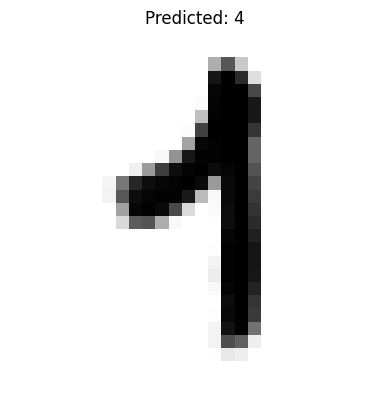

Probabilità per ogni classe: [[0.05245656 0.1951573  0.2126827  0.00357896 0.30374652 0.01036548
  0.04409904 0.10437854 0.0479679  0.02556693]]
Classe predetta: 4

Elaboro: ./Pictures/zero.png
1/1 [==============================] - 0s 25ms/step


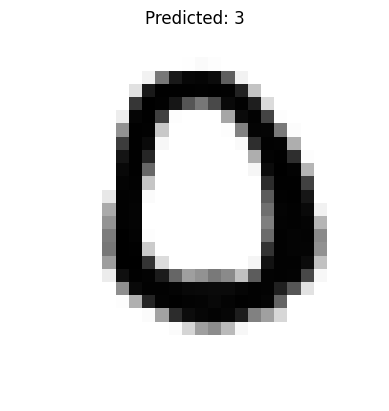

Probabilità per ogni classe: [[6.2863730e-02 2.8227512e-03 6.9351890e-03 5.1178205e-01 3.0184157e-02
  1.7258264e-02 6.6156575e-04 6.8633257e-05 4.7967531e-02 3.1945613e-01]]
Classe predetta: 3



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import glob

i=1  #0 rete DNN, 1 rete CNN

# Carica il modello già allenato
if i==1:
    model = load_model("mnist_cnn_model.h5")
    print("Modello caricato con successo!")
elif i==0:
    model = load_model("mnist_dnn_model.h5")
    print("Modello caricato con successo!")

# Percorso immagini
image_folder = "./Pictures/"
image_files = sorted(
    glob.glob(image_folder + "*.[pjP][pnN][gG]") + 
    glob.glob(image_folder + "*.[jJ][pP][gG]")
)
image_files = image_files[:10]


for img_path in image_files:
    print(f"Elaboro: {img_path}")

    # Carica, scala, normalizza, inverte
    img = Image.open(img_path).convert('L')
    img_resized = img.resize((28, 28))
    data = np.array(img_resized).astype('float32') / 255.0
    data = 1 - data  # inverti colori se necessario

    if i == 1:  # CNN
        input_data = data.reshape(1, 28, 28, 1)
    elif i == 0:  # DNN
        input_data = data.reshape(1, 784)

    # Predizione
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)

    # Visualizza risultato
    plt.imshow(data, cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    print("Probabilità per ogni classe:", prediction)
    print("Classe predetta:", predicted_class)
    print()
